# Quadratic Discriminant Analysis (QDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.decomposition import PCA
from sklearn import datasets
labels = iris.target
y = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)

y_pred = qda.fit(X_pca, y)

In [4]:
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = y_pred.predict(np.c_[xx.ravel(), yy.ravel()])

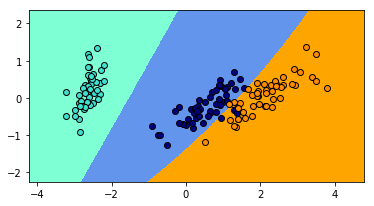

In [5]:

colors = ['turquoise','navy',  'darkorange']

from matplotlib.colors import ListedColormap
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['aquamarine', 'cornflowerblue', 'orange'])
y = y

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c,edgecolor='k', label=label)
plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap_light, origin='lower')
plt.show()